In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import numpy.random as rnd

word_stream_raw=r'q4\data\words_stream.txt'
word_stream_tiny_raw=r'q4\data\words_stream_tiny.txt'
counts_raw=r'q4\data\counts.txt'
counts_tiny_raw=r'q4\data\counts_tiny.txt'
hash_params_raw=r'q4\data\hash_params.txt'

In [43]:
'''Counts and Param Load'''
counts = np.genfromtxt(counts_raw,dtype=(int,int),delimiter="\t")
counts_tiny = np.genfromtxt(counts_tiny_raw,dtype=(int,int),delimiter="\t")
hash_params = np.loadtxt(hash_params_raw,dtype=(int,int),delimiter="\t")

In [44]:
'''Stream Load'''
#word_stream = np.genfromtxt(word_stream_raw)
word_stream_tiny = np.loadtxt(word_stream_tiny_raw, dtype=(int))

In [28]:
'''Parameters'''
delta=1e-5
eps=np.e*1e-4
n_buckets=10000 #np.e / eps
p=123457
t=len(counts_tiny)

array([  1,   2,   3, ..., 395,  73,  88])

In [45]:
# Returns hash(x) for hash function given by parameters a, b, p and n_buckets
def hash_fun(a, b, p, n_buckets, x):
    y = x % p
    hash_val = (a*y + b) % p
    return hash_val % n_buckets

In [49]:
def hash_1(x):
    a=hash_params[0][0]
    b=hash_params[0][1]
    return hash_fun(a,b,p,n_buckets,x)
def hash_2(x):
    a=hash_params[1][0]
    b=hash_params[1][1]
    return hash_fun(a,b,p,n_buckets,x)
def hash_3(x):
    a=hash_params[2][0]
    b=hash_params[2][1]
    return hash_fun(a,b,p,n_buckets,x)
def hash_4(x):
    a=hash_params[3][0]
    b=hash_params[3][1]
    return hash_fun(a,b,p,n_buckets,x)
def hash_5(x):
    a=hash_params[4][0]
    b=hash_params[4][1]
    return hash_fun(a,b,p,n_buckets,x)

In [50]:
dict_word_buckets={}
buckets=np.zeros(shape=(5,n_buckets))

In [51]:
for word in word_stream_tiny:
    h1=hash_1(word)
    h2=hash_2(word)
    h3=hash_3(word)
    h4=hash_4(word)
    h5=hash_5(word)
    if word not in dict_word_buckets.keys():
        dict_word_buckets[word]=[h1,h2,h3,h4,h5]
    else:
        if dict_word_buckets[word]!=[h1,h2,h3,h4,h5]:
            print('Wait what?')
    buckets[0][h1]+=1
    buckets[1][h2]+=1
    buckets[2][h3]+=1
    buckets[3][h4]+=1
    buckets[4][h5]+=1

In [56]:
dict_word_counts={}

In [57]:
for word in dict_word_buckets.keys():
    b1=buckets[0][dict_word_buckets[word][0]]
    b2=buckets[1][dict_word_buckets[word][1]]
    b3=buckets[2][dict_word_buckets[word][2]]
    b4=buckets[3][dict_word_buckets[word][3]]
    b5=buckets[4][dict_word_buckets[word][4]]
    dict_word_counts[word]=min(b1,b2,b3,b4,b5)

In [83]:
ErrorVsFreq=np.zeros(shape=(len(dict_word_counts.keys()),2))
dict_word_actual_counts={}

for i in counts_tiny:
    dict_word_actual_counts[i[0]]=i[1]

In [84]:
for i, word in enumerate(dict_word_counts.keys()):
    Error=(dict_word_counts[word]-dict_word_actual_counts[word])/dict_word_actual_counts[word]
    Freq=dict_word_actual_counts[word]/t
    ErrorVsFreq[i][0]=Error
    ErrorVsFreq[i][1]=Freq

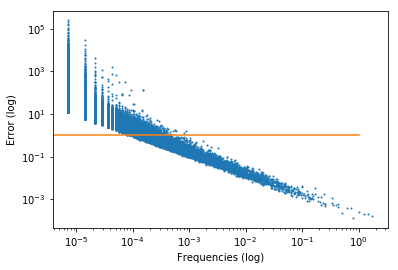

In [102]:
E=ErrorVsFreq[:,0]
F=ErrorVsFreq[:,1]
plt.loglog(F,E,'.',markersize=2)
plt.xlabel('Frequencies (log)')
plt.ylabel('Error (log)')
plt.loglog([0,1],[1,1])
plt.show()